In [3]:
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info import Operator
import numpy as np

#variables
gamma=1
epsilon=1
mu=0
T=10
beta=1/T

#fermi-dirac distribution
def F(beta,epsilon,mu):
  return 1/(np.exp(beta*(epsilon-mu))+1)


#coefficients definition for simplicity
c1=gamma*(1-F(beta,epsilon,mu))
c2=gamma*F(beta,epsilon,mu)


#operator for real time evolution
labels_real_part=["IZ", "ZI"]
real_coeff=[epsilon/2,epsilon/2]

#operator for imaginary time evolution
labels_im_part=["XX", "YY", "II", "IZ", "ZI", "XY", "YX"]
im_coeff=[gamma/4, -gamma/4, -gamma/2, (c1-c2)/4,(c1-c2)/4,1j*(c1-c2)/4,1j*(c1-c2)/4]

#creating the operators
im_part=SparsePauliOp(labels_im_part,im_coeff)
real_part=SparsePauliOp(labels_real_part,real_coeff)


#setting up ansatz
from qiskit.circuit.library import EfficientSU2
ansatz = EfficientSU2(real_part.num_qubits, reps=1)
init_param_values = {}
for i in range(len(ansatz.parameters)):
    init_param_values[ansatz.parameters[i]] = np.pi/2

    

from qiskit_algorithms.time_evolvers.variational import ImaginaryMcLachlanPrinciple
from qiskit_algorithms.time_evolvers.variational import RealMcLachlanPrinciple
var_principle_im = ImaginaryMcLachlanPrinciple()
var_principle_real = RealMcLachlanPrinciple()
from qiskit_algorithms import TimeEvolutionProblem
from qiskit_algorithms import VarQITE
from qiskit_algorithms import VarQRTE
from qiskit.quantum_info import Statevector


init_state = Statevector(ansatz.assign_parameters(init_param_values))
print(init_state)
print()


totaltime=1
dt=0.1
for i in range(int(np.floor(totaltime/dt))):

  #doing the imaginary time evolution
  evolution_problem = TimeEvolutionProblem(im_part, dt)
  var_qite = VarQITE(ansatz, init_param_values, var_principle_im, num_timesteps=1)
  evolution_result_im = var_qite.evolve(evolution_problem)
  evolution_result_parameters_im=evolution_result_im.parameter_values

  #doing the real time evolution
  evolution_problem = TimeEvolutionProblem(real_part, dt)
  var_qrte = VarQRTE(ansatz, init_param_values, var_principle_real,num_timesteps=1)
  evolution_result_real = var_qrte.evolve(evolution_problem)
  evolution_result_parameters_real=evolution_result_real.parameter_values

  #reassigning the parameters by adding together the rotation angles from the two evolution results
  for i in range(len(ansatz.parameters)):
    init_param_values[ansatz.parameters[i]] = evolution_result_parameters_im[1,i]+evolution_result_parameters_real[1,i]

  #trying to extract the population with trace normalization
  init_state = Statevector(ansatz.assign_parameters(init_param_values))
  print(init_state[3]/(init_state[0]+init_state[3]))




Statevector([-0.5+0.j , -0.5+0.j ,  0. -0.5j,  0. +0.5j],
            dims=(2, 2))

(0.5000000000000056+0.016047693894050866j)
(-0.0002551795975909362-3.2885858484633744e-05j)
(-0.051160588689723764-0.014737868592309744j)
(-0.1457381021071335-0.09803588416202107j)
(-0.05704117882662428-0.4164375737146893j)
(0.48688031221303696-0.25837506269160687j)
(1.03074159243691-0.10808277451916325j)
(0.5708679817752866+0.004564177989210165j)
(-1.5621368727708242-1.094636737047913j)
(0.34764682282106013-0.2622216448637893j)


VQE Workshop for RTE


In [4]:
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info import Operator
import numpy as np
from qiskit_algorithms.time_evolvers.variational import ImaginaryMcLachlanPrinciple
from qiskit_algorithms.time_evolvers.variational import RealMcLachlanPrinciple
var_principle_im = ImaginaryMcLachlanPrinciple()
var_principle_real = RealMcLachlanPrinciple()
from qiskit_algorithms import TimeEvolutionProblem
from qiskit_algorithms import VarQITE
from qiskit_algorithms import VarQRTE
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import EfficientSU2

hamiltonian = SparsePauliOp(["ZZ", "IX", "XI"], coeffs=[-0.2, -1, -1])

magnetization = SparsePauliOp(["IZ", "ZI"], coeffs=[1, 1])



ansatz = EfficientSU2(hamiltonian.num_qubits, reps=1)
# ansatz.decompose().draw("mpl")
init_param_values = {}

for i in range(len(ansatz.parameters)):
    init_param_values[ansatz.parameters[i]] = (
        np.pi / 2
    )  
    init_state = Statevector(ansatz.assign_parameters(init_param_values))
print(init_state)

TypeError: ParameterExpression with unbound parameters (dict_keys([ParameterVectorElement(θ[1])])) cannot be cast to a float.

In [ ]:
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info import Operator
import numpy as np

#variables
gamma=1
epsilon=1
mu=0
T=10
beta=1/T

#fermi-dirac distribution
def F(beta,epsilon,mu):
  return 1/(np.exp(beta*(epsilon-mu))+1)


#coefficients definition for simplicity
c1=gamma*(1-F(beta,epsilon,mu))
c2=gamma*F(beta,epsilon,mu)


#operator for real time evolution
labels_real_part=["IZ", "ZI"]
real_coeff=[epsilon/2,epsilon/2]

#operator for imaginary time evolution
labels_im_part=["XX", "YY", "II", "IZ", "ZI", "XY", "YX"]
im_coeff=[gamma/4, -gamma/4, -gamma/2, (c1-c2)/4,(c1-c2)/4,1j*(c1-c2)/4,1j*(c1-c2)/4]

#creating the operators
im_part=SparsePauliOp(labels_im_part,im_coeff)
real_part=SparsePauliOp(labels_real_part,real_coeff)


#setting up ansatz
from qiskit.circuit.library import EfficientSU2
ansatz = EfficientSU2(real_part.num_qubits, reps=1)
init_param_values = {}
for i in range(len(ansatz.parameters)):
    init_param_values[ansatz.parameters[i]] = np.pi/2

    

from qiskit_algorithms.time_evolvers.variational import ImaginaryMcLachlanPrinciple
from qiskit_algorithms.time_evolvers.variational import RealMcLachlanPrinciple
var_principle_im = ImaginaryMcLachlanPrinciple()
var_principle_real = RealMcLachlanPrinciple()
from qiskit_algorithms import TimeEvolutionProblem
from qiskit_algorithms import VarQITE
from qiskit_algorithms import VarQRTE
from qiskit.quantum_info import Statevector


init_state = Statevector(ansatz.assign_parameters(init_param_values))
print(init_state)
print()


totaltime=1
dt=0.1
for i in range(int(np.floor(totaltime/dt))):

  #doing the imaginary time evolution
  evolution_problem = TimeEvolutionProblem(im_part, dt)
  var_qite = VarQITE(ansatz, init_param_values, var_principle_im, num_timesteps=1)
  evolution_result_im = var_qite.evolve(evolution_problem)
  evolution_result_parameters_im=evolution_result_im.parameter_values

  #doing the real time evolution
  evolution_problem = TimeEvolutionProblem(real_part, dt)
  var_qrte = VarQRTE(ansatz, init_param_values, var_principle_real,num_timesteps=1)
  evolution_result_real = var_qrte.evolve(evolution_problem)
  evolution_result_parameters_real=evolution_result_real.parameter_values

  #reassigning the parameters by adding together the rotation angles from the two evolution results
  for i in range(len(ansatz.parameters)):
    init_param_values[ansatz.parameters[i]] = evolution_result_parameters_im[1,i]+evolution_result_parameters_real[1,i]

  #trying to extract the population with trace normalization
  init_state = Statevector(ansatz.assign_parameters(init_param_values))
  print(init_state[3]/(init_state[0]+init_state[3]))




Maybe Final 


In [ ]:
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit.circuit.library import EfficientSU2
from qiskit_algorithms.time_evolvers.variational import RealMcLachlanPrinciple
from qiskit_algorithms import TimeEvolutionProblem, VarQRTE
import numpy as np

epsilon = 1.0

# Set up operator  
labels_real_part = ["IZ", "ZI"]
real_coeff = [epsilon / 2, epsilon / 2]
real_part = SparsePauliOp(labels_real_part, real_coeff)

# Setting up the ansatz circuit
ansatz = EfficientSU2(real_part.num_qubits, reps=1)

# Initialize the params
init_param_values = {param: np.pi / 2 for param in ansatz.parameters}

var_principle_real = RealMcLachlanPrinciple()


total_time = 1.0
dt = 0.1


initial_state = Statevector(ansatz.assign_parameters(init_param_values))
print(f"Time: 0.0, Probabilities: {np.real(initial_state.probabilities())}")

# Loop over each time step
num_steps = int(np.floor(total_time / dt))
for i in range(num_steps):
    evolution_problem = TimeEvolutionProblem(real_part, dt)

    var_qrte = VarQRTE(ansatz, init_param_values, var_principle_real, num_timesteps=1)
    
   #evolve   
    evolution_result_real = var_qrte.evolve(evolution_problem)


    final_params = evolution_result_real.parameter_values[1]

    # Update   
    for j, param in enumerate(ansatz.parameters):
        init_param_values[param] = final_params[j]

    # --- Output Results for the current step ---
    evolved_state = Statevector(ansatz.assign_parameters(init_param_values))
    
    # Probability of measuring |00>, |01>, |10>, |11>
    print(f"Time: {(i+1)*dt:.1f}, Probabilities: {np.real(evolved_state.probabilities())}")

Time: 0.0, Probabilities: [0.25 0.25 0.25 0.25]
Time: 0.1, Probabilities: [0.25 0.25 0.25 0.25]
Time: 0.2, Probabilities: [0.25000208 0.24999792 0.24999792 0.25000208]
Time: 0.3, Probabilities: [0.25000975 0.24999025 0.24999025 0.25000975]
Time: 0.4, Probabilities: [0.25002667 0.24997333 0.24997333 0.25002667]
Time: 0.5, Probabilities: [0.25005675 0.24994325 0.24994325 0.25005675]
Time: 0.6, Probabilities: [0.25010431 0.24989569 0.24989569 0.25010431]
Time: 0.7, Probabilities: [0.2501742 0.2498258 0.2498258 0.2501742]
Time: 0.8, Probabilities: [0.25027186 0.24972814 0.24972814 0.25027186]
Time: 0.9, Probabilities: [0.25040349 0.24959651 0.24959651 0.25040349]
Time: 1.0, Probabilities: [0.25057601 0.24942399 0.24942399 0.25057601]


Statevector([-0.5+0.j , -0.5+0.j ,  0. -0.5j,  0. +0.5j],
            dims=(2, 2))


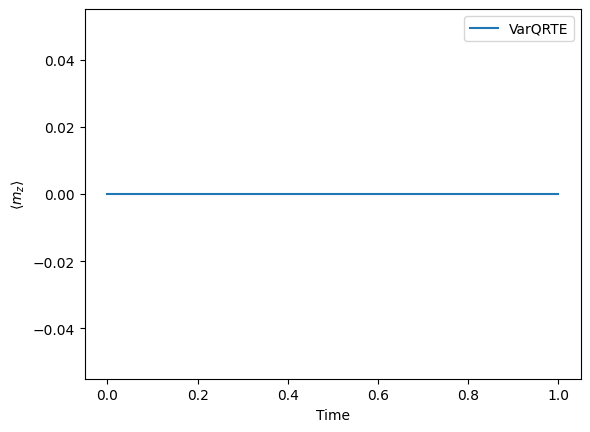

In [ ]:
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import EfficientSU2
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit_algorithms.time_evolvers.variational import RealMcLachlanPrinciple
from qiskit_algorithms import TimeEvolutionProblem
from qiskit_algorithms import VarQRTE
from qiskit.primitives import Estimator
from qiskit_algorithms import SciPyRealEvolver
import pylab

eps = 1

hamiltonian = SparsePauliOp(["IZ", "ZI"], coeffs=[-eps/2, eps/2])

magnetization = SparsePauliOp(["IZ", "ZI"], coeffs=[1, 1])

ansatz = EfficientSU2(hamiltonian.num_qubits, reps=1)

init_param_values = {}

for i in range(len(ansatz.parameters)):
    init_param_values[ansatz.parameters[i]] = (
        np.pi / 2
    )  # initialize the parameters which also decide the initial state
    
init_state = Statevector(ansatz.assign_parameters(init_param_values))
print(init_state)

var_principle = RealMcLachlanPrinciple()

aux_ops = [magnetization]

time = 1.0
evolution_problem = TimeEvolutionProblem(hamiltonian, time, aux_operators=aux_ops)
var_qrte = VarQRTE(ansatz, init_param_values, var_principle, Estimator())
evolution_result_re = var_qrte.evolve(evolution_problem)

evolution_problem = TimeEvolutionProblem(
    hamiltonian, time, initial_state=init_state, aux_operators=aux_ops
)
#rtev = SciPyRealEvolver(1001)
#sol = rtev.evolve(evolution_problem)

# Extract observable values safely
mz_exp_val_re = np.array([obs[0][0] for obs in evolution_result_re.observables])
#exact_mz_exp_val_re = np.real(sol.observables[0])
times = evolution_result_re.times
pylab.plot(times, mz_exp_val_re, label="VarQRTE")
#pylab.plot(times, exact_mz_exp_val_re, label="Exact", linestyle="--")
pylab.xlabel("Time")
pylab.ylabel(r"$\langle m_z \rangle$")
pylab.legend(loc="upper right")
pylab.show()


In [ ]:
# !pip install qiskit==1.4.3

  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached symengine-0.13.0-cp311-cp311-win_amd64.whl.metadata (1.2 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/6.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.5 MB ? eta -:--:--
   --- ------------------------------------ 0.5/6.5 MB 1.2 MB/s eta 0:00:06
   ------ --------------------------------- 1.0/6.5 MB 1.7 MB/s eta 0:00:04
   --------- ------------------------------ 1.6/6.5 MB 1.8 MB/s eta 0:00:03
   -------------- ------------------------- 2.4/6.5 MB 2.2 MB/s eta 0:00:02
   ------------------- -------------------- 3.1/6.5 MB 2.5 MB/s eta 0:00:02
   ---------------------- ----------------- 3.7/6.5 MB 2.5 MB/s eta 0:00:02
   --------------------------- ------------ 4.5/6.5 MB 2.7 MB/s eta 0:00:01
   --------------------------------- ------ 5.5/6.5 MB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 6.5/6.5 M

  You can safely remove it manually.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\tessa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np

def hamiltonian_generation(eps, gamma, mu, T):
    """
    Generates the Hamiltonian for the system of a single qubit coupled to a reservoir.

    Inputs:
        eps: (float) Coupling strength of the qubit to the reservoir.
        gamma: (float) Coupling strength of the qubit to the environment.
        mu: (float) Chemical potential of the reservoir.
        T: (float) Temperature of the reservoir.
    Returns:
        hamiltonian_re: SparsePauliOp representing the real part of the Hamiltonian of the system.
        hamiltonian_im: SparsePauliOp representing the imaginary part of the Hamiltonian of the system.
    """
    
    F = 1 / (1 + np.exp((eps - mu) / T))
    hamiltonian_re = SparsePauliOp(["IZ", "ZI", "XY", "YX"], coeffs=[-eps / 2, eps / 2, -(gamma * (1 - 2*F)) / 4, -(gamma * (1 - 2*F)) / 4])
    hamiltonian_im = -1 * SparsePauliOp(["XX", "YY", "II", "IZ", "ZI"], coeffs=[gamma / 4, -gamma / 4, -gamma / 2, (gamma * (1 - 2*F)) / 4, (gamma * (1 - 2*F)) / 4])
    
    return hamiltonian_re, hamiltonian_im

def hamiltonian_generation_simple():
    """
    Generates a simple Hamiltonian for a single qubit system.

    Returns:
        hamiltonian_re: SparsePauliOp representing the Hamiltonian.
    """
    return SparsePauliOp(["IX", "XI"], coeffs=[1, -1])  # Example coefficients

def statevector_to_densitymatrix(v):
    """
    Converts a Statevector to a density matrix.

    Inputs:
        v: (numpy.ndarray) The state vector to be converted.
    
    Returns:
        (numpy.ndarray) The corresponding density matrix.
    """
    m = int(np.sqrt(len(v)))
    return np.reshape(v, (m, m), order='F')

Initial State: Statevector([0.61992668-0.64308201j, 0.15997913-0.05642574j,
             0.31615777-0.07099076j, 0.24563445+0.08959659j],
            dims=(2, 2))


C:\Users\tessa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\tessa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


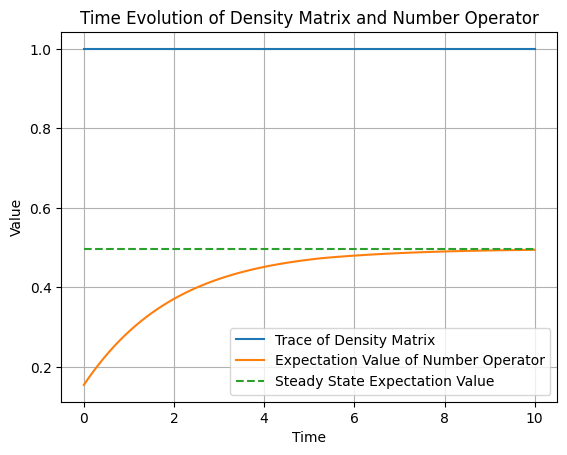

In [5]:
from qiskit.circuit.library import EfficientSU2
import numpy as np
#from utils import hamiltonian_generation, statevector_to_densitymatrix
from qiskit.quantum_info import Statevector
from qiskit_algorithms.time_evolvers.variational import RealMcLachlanPrinciple, ImaginaryMcLachlanPrinciple
from qiskit_algorithms import TimeEvolutionProblem, VarQRTE, VarQITE
from qiskit_algorithms.gradients import ReverseEstimatorGradient, ReverseQGT, DerivativeType
import matplotlib.pyplot as plt

# Defining parameters
eps = 1
gamma = 1
mu = 0
T = 100

# Generate Hamiltonian
ham_real, ham_imag = hamiltonian_generation(eps, gamma, mu, T)

# Prepare the ansatz and initial state
ansatz = EfficientSU2(ham_real.num_qubits, reps=1)
init_param_values = {}
for i in range(len(ansatz.parameters)):
    init_param_values[ansatz.parameters[i]] = (
        np.pi / 8
    )  # initialize the parameters which also decide the initial state
init_state = Statevector(ansatz.assign_parameters(init_param_values))

print("Initial State:", init_state)
# Define the variational principles for time evolution
real_var_principle = RealMcLachlanPrinciple(qgt=ReverseQGT(), gradient=ReverseEstimatorGradient(derivative_type=DerivativeType.IMAG))
imag_var_principle = ImaginaryMcLachlanPrinciple(qgt=ReverseQGT(), gradient=ReverseEstimatorGradient())

# Time evolution parameters
time = 10.0
nt = 100
dt = time / nt

# Initialize lists to store results
#second is the is expectation value of the number operator
trace_list = [1.0]
num_op_list = [np.trace(statevector_to_densitymatrix(init_state.data) @ np.array([[0, 0], [0, 1]])) / np.trace(statevector_to_densitymatrix(init_state.data))]



# Perform time evolution
for t in range(1, nt):
    # Real evolution
    evolution_problem = TimeEvolutionProblem(ham_real, dt / 2)
    var_qrte = VarQRTE(ansatz, init_param_values, real_var_principle, num_timesteps=1)
    evolution_result_re = var_qrte.evolve(evolution_problem)
    init_param_values = evolution_result_re.parameter_values[-1]
    
    # Imaginary evolution
    evolution_problem = TimeEvolutionProblem(ham_imag, dt / 2)
    var_qite = VarQITE(ansatz, init_param_values, imag_var_principle, num_timesteps=1)
    evolution_result_im = var_qite.evolve(evolution_problem)
    init_param_values = evolution_result_im.parameter_values[-1]
    
    # Calculate the trace and expectation value of the number operator
    trace = np.trace(statevector_to_densitymatrix(Statevector(ansatz.assign_parameters(init_param_values)).data))
    trace_list.append(1.0) # Normalized so the trace is always 1
    num_op_list.append(np.trace(statevector_to_densitymatrix(Statevector(ansatz.assign_parameters(init_param_values)).data) @ np.array([[0, 0], [0, 1]])) / trace)

# Plotting the results
plt.plot(np.linspace(0, time, nt), trace_list, label='Trace of Density Matrix')
plt.plot(np.linspace(0, time, nt), num_op_list, label='Expectation Value of Number Operator')
plt.plot(np.linspace(0, time, nt), [1 / (1 + np.exp((eps - mu) / T))] * nt, label='Steady State Expectation Value', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Evolution of Density Matrix and Number Operator')
plt.legend()
plt.grid()
plt.show()

In [6]:
print("Initial expectation value of number operator:", num_op_list[0])

Initial expectation value of number operator: (0.1544431211984246+0.2022718001862916j)
